In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

### 1. return

In [19]:
# INSTRUCTION:
# change itv to generate results for 0.125, 0.25 ...
# change algorithm to either td3 or ppo
#----------------------------------------------------

import glob
interval = ["point125","point25","point5","point75","one"]
itv = interval[3]
algorithm = "td3" # "ppo"
visitors = "multi"  # single
network = "64_64_NN" # 300_NN or 64_64_NN or 300_300_NN
txt_dir = "../SHARCNET/Results/"+visitors+"/aug_obs/"+algorithm+"/"#+ network+"/"+itv+"/"
pic_dir = "./plots_for_thesis/"+visitors+"/"+algorithm+"/"#network+"/"
modes = ["SARA","PLA"]
all_data_files = dict()
for mode in modes:
    mode_data_files = glob.glob(txt_dir+ mode + "/**/" +"*.txt", recursive=True)
    mode_data_files.sort()
    print("{}: {} files found".format(mode,len(mode_data_files)))
    for f in mode_data_files:
        print(f)
    all_data_files[mode]=mode_data_files

SARA: 2 files found
../SHARCNET/Results/multi/aug_obs/td3/SARA\2019-10-18-144921-0-0\td3\td3_s0\progress.txt
../SHARCNET/Results/multi/aug_obs/td3/SARA\2019-10-18-144921-1-0\td3\td3_s0\progress.txt
PLA: 2 files found
../SHARCNET/Results/multi/aug_obs/td3/PLA\2019-10-18-144921-1-0\td3\td3_s0\progress.txt
../SHARCNET/Results/multi/aug_obs/td3/PLA\2019-10-18-144925-0-0\td3\td3_s0\progress.txt


In [20]:
txt_dir

'../SHARCNET/Results/multi/aug_obs/td3/'

In [21]:
all_combined_data = dict()
if algorithm == "ppo":
    metrics = ["AverageEpRet", "AverageVVals"]
    col_names = ["return", "V_means"]
else:
    metrics = ["AverageEpRet", "AverageQ1Vals", "AverageQ2Vals"]
    col_names = ["return","Q1_means","Q2_means"]
for mode in modes:

    mode_data = []
    for file in all_data_files[mode]:
        mode_data.append(pd.read_csv(file, sep="\t"))
    
    mode_combined_data = pd.DataFrame()
    for metric, col_name in zip(metrics, col_names):
        metric_combined_data = pd.DataFrame()
        for i in range(len(all_data_files[mode])):
            metric_combined_data[col_name+"_run"+str(i)] = mode_data[i][metric]
        metric_combined_data[col_name+"_avg"] = metric_combined_data.mean(axis=1)
        metric_combined_data[col_name+'_std'] = metric_combined_data.std(axis=1)
        
        mode_combined_data = pd.concat([mode_combined_data,metric_combined_data],axis=1)
    all_combined_data[mode] = mode_combined_data

In [22]:
all_combined_data['PLA']

,return_run0,return_run1,return_avg,return_std,Q1_means_run0,Q1_means_run1,Q1_means_avg,Q1_means_std,Q2_means_run0,Q2_means_run1,Q2_means_avg,Q2_means_std
0,17.896173,17.166504,17.531339,0.364835,0.504093,0.320568,0.412331,0.091763,0.465013,0.542953,0.503983,0.038970
1,48.297670,50.645016,49.471343,1.173673,1.300456,1.173110,1.236783,0.063673,1.283149,1.297938,1.290544,0.007394
2,38.982136,41.471596,40.226866,1.244730,1.463526,1.512746,1.488136,0.024610,1.453602,1.497211,1.475407,0.021804
3,35.467003,38.465690,36.966347,1.499343,1.523855,1.562211,1.543033,0.019178,1.529948,1.550586,1.540267,0.010319
4,36.747147,45.990260,41.368703,4.621557,1.577149,1.705148,1.641149,0.063999,1.583856,1.700262,1.642059,0.058203
5,38.087208,41.456997,39.772103,1.684894,1.645760,1.784771,1.715266,0.069506,1.644794,1.781916,1.713355,0.068561
6,37.578600,41.831593,39.705096,2.126496,1.749001,1.903052,1.826026,0.077026,1.749092,1.897568,1.823330,0.074238
7,40.468330,47.763300,44.115815,3.647485,1.856063,2.002456,1.929260,0.073196,1.858925,2.011781,1.935353,0.076428
8,42.595257,40.680680,41.637968,0.957289,1.929833,2.126724,2.028278,0.098446,1.923396,2.123960,2.023678,0.100282
9,40.479343,40.802197,40.640770,0.161427,2.092637,2.193370,2.143004,0.050367,2.093644,2.197032,2.145338,0.051694


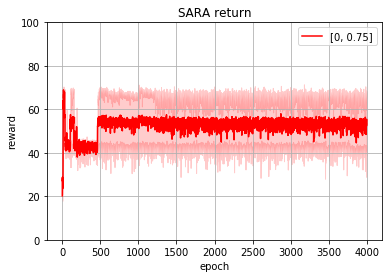

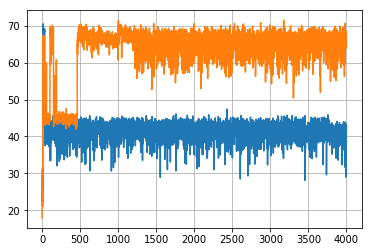

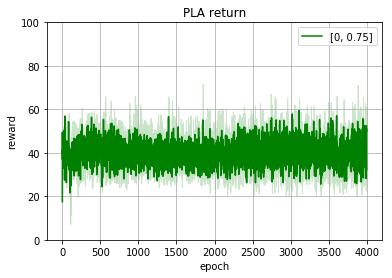

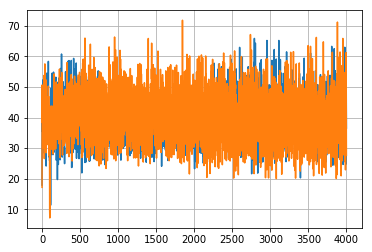

In [23]:
# Plot return
colors = ['r','g','b']
metric = "return"
modes = ["SARA","PLA"]
for mode, c in zip(modes, colors):

    data = all_combined_data[mode]
    length = data.shape[0]
    if length == 0:
        print("No data from {}".format(mode))
        continue
    label = "[0, "+itv.replace("point","0.")+"]"
    
    plt.figure()
    plt.grid()
    plt.fill_between(data.index, data[metric+"_avg"] - data[metric+"_std"],
                 data[metric+'_avg'] + data[metric+'_std'], alpha=0.2,
                 color=c)
    plt.plot(data.index, data[metric+'_avg'], '-', color=c,
         label=label)
    plt.legend(loc="best")
    plt.ylim([0,100])
    plt.title('{} {}'.format(mode,metric))
    plt.xlabel("epoch")
    plt.ylabel("reward")
    plt.savefig(pic_dir+"{}_{}_{}.png".format(itv,mode,metric), bbox_inches='tight')
    
    plt.figure()
    plt.grid()
    for i in range(2):
        plt.plot(data.index, data[metric+'_run'+str(i)], '-', label=label)


### 2. V_mean

No data from PLA


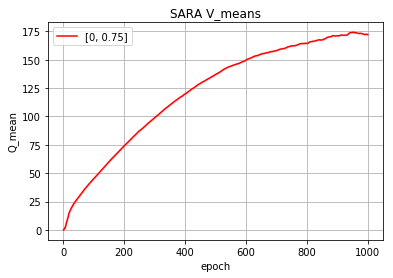

In [57]:
colors = ['r','g','b']
metric = "V_means"
modes = ["SARA","PLA"]
for mode, c in zip(modes, colors):

    data = all_combined_data[mode]
    length = data.shape[0]
    if length == 0:
        print("No data from {}".format(mode))
        continue
    label = "[0, "+itv.replace("point","0.")+"]"
    
    plt.figure()
    plt.grid()
    plt.fill_between(np.linspace(1,1000,length), data[metric+"_avg"] - data[metric+"_std"],
                 data[metric+'_avg'] + data[metric+'_std'], alpha=0.2,
                 color=c)
    plt.plot(np.linspace(1,1000,length), data[metric+'_avg'], '-', color=c,
         label=label)
    plt.legend(loc="best")
#     plt.ylim([0,27])
    plt.title('{} {}'.format(mode,metric))
    plt.xlabel("epoch")
    plt.ylabel("Q_mean")
    plt.savefig(pic_dir+'/{}_{}_{}.png'.format(itv,mode,metric), bbox_inches='tight')
    

(0, 4)